In [2]:
# plotting coupling and PE together



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.ndimage import uniform_filter1d

In [5]:
# loading data
df = pd.read_csv('scr_amg_hipp_all.csv')
df.head()

,sub,Condition,Event.Nr,CDA.AmpSum,expected_value,pe,scr,index,subject,trialNo,condition,coupling,amg,amg_vmpfc
0,sub-189,CSplusUS1,1,0.2852,0.773082,0.500000,0.2852,3036,sub-189,1,CSplusUS1,0.904762,0.476625,0.833333
1,sub-189,CSminus1,2,0.1033,0.770982,-0.500000,0.1033,3037,sub-189,2,CSminus1,-0.380952,0.081692,0.428571
2,sub-189,CSplus1,3,0.0783,0.772029,-0.500672,0.0783,3038,sub-189,3,CSplus1,0.571429,-0.219659,0.690476
3,sub-189,CSplusUS1,4,0.1772,0.773079,0.500002,0.1772,3039,sub-189,4,CSplusUS1,0.619048,0.006618,0.880952
4,sub-189,CSminus1,5,0.0000,0.769936,-0.499328,0.0000,3040,sub-189,5,CSminus1,0.833333,-0.188212,0.595238


In [28]:
# averaging coupling and PE per trial, across all subjects
amg_hipp = df.groupby("Event.Nr")["coupling"].mean()
PE = df.groupby("Event.Nr")['pe'].mean()
x = np.arange(69)

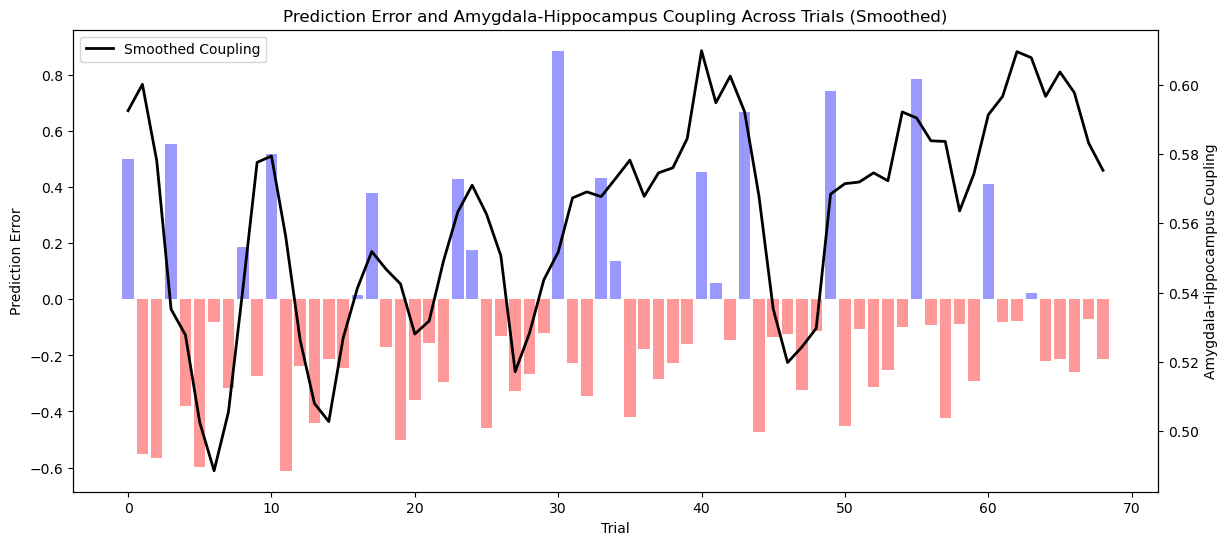

In [38]:
# Plot with smoothing and reduced opacity

# Smooth the coupling line with moving average
smoothed_Amy_Hipp = uniform_filter1d(amg_hipp, size=4)  # window size = 5
fig, ax1 = plt.subplots(figsize=(14,6))
# Bar plot for PE with reduced opacity
colors = ['blue' if val > 0 else 'red' for val in PE]
ax1.bar(x, PE, color=colors, alpha=0.4)
ax1.set_ylabel("Prediction Error", color='black')
ax1.set_xlabel("Trial")
# Line plot for Amygdala-Hippocampus coupling (smoothed)
ax2 = ax1.twinx()
ax2.plot(x, smoothed_Amy_Hipp, color='black', linewidth=2, label="Smoothed Coupling")
ax2.set_ylabel("Amygdala-Hippocampus Coupling", color='black')
plt.title("Prediction Error and Amygdala-Hippocampus Coupling Across Trials (Smoothed)")
plt.legend(loc="upper left")
# save is
plt.savefig("smoothed_coupling_pe.png", dpi=300, bbox_inches = "tight")
plt.show()

